<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab07_interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio metodos computacionales, 
# Interpolacion





# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.











Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [47]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import newton
from scipy.interpolate import lagrange

In [48]:
vo = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = vo/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

def pos_x(t, vo, theta0, u, alpha, b, g  ):
  t1 = u*np.cos(alpha)*t  
  t2 = 1./b*(vo*np.cos(theta0)-u*np.cos(alpha))  
  t3 = (1-np.exp(-b*t))
  return t1 + t2 * t3


def pos_y(t, vo, theta0, u, alpha, b, g  ):
  t1 = (g/b + vo*np.sin(theta0) - u* np.sin(alpha) )
  t2 = (1-np.exp(-b*t)) 
  t3 = (g/b - u*np.sin(alpha))*t 
  return 1./b * t1 * t2 - t3

In [49]:
t = np.linspace(0, 8.5, 100)
Params = (vo, theta, u, alpha, b , g)  #Parametros en tupla.
x = pos_x(t, *Params)
y = pos_y(t, *Params)

In [50]:
dicc = {"x":x,"y":y ,"t":t}
df = pd.DataFrame(dicc)

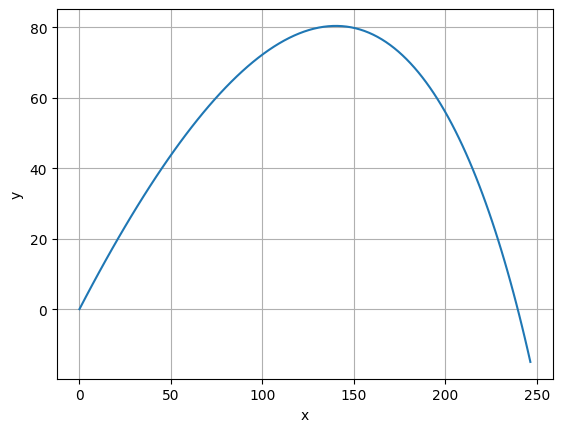

In [51]:
plt.plot(df.x, df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

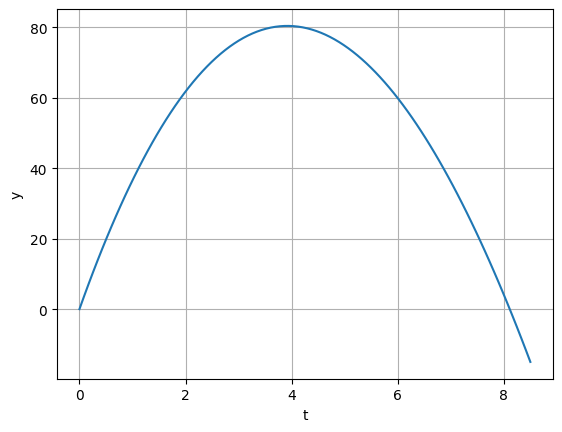

In [52]:
plt.plot(df.t, df.y)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()

In [53]:
tv = newton(pos_y, 6.5, args=Params)
tv

8.111627022095584

In [54]:
pos_x(tv, *Params)

239.60614945520726

# Generalizacion

In [55]:
np.arange(5, 85, 5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [56]:
theta = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento
theta

array([0.08726646, 0.17453293, 0.26179939, 0.34906585, 0.43633231,
       0.52359878, 0.61086524, 0.6981317 , 0.78539816, 0.87266463,
       0.95993109, 1.04719755, 1.13446401, 1.22173048, 1.30899694])

In [57]:
Rmax = np.zeros(len(theta))
for i, te in enumerate(theta):
  Params = (vo, te, u, alpha, b , g)  #Parametros en tupla.
  tv = newton(pos_y, 6.5, args = Params)
  Rmax[i] = pos_x(tv, *Params)
  #print(tv,pos_x(tv, *Params))

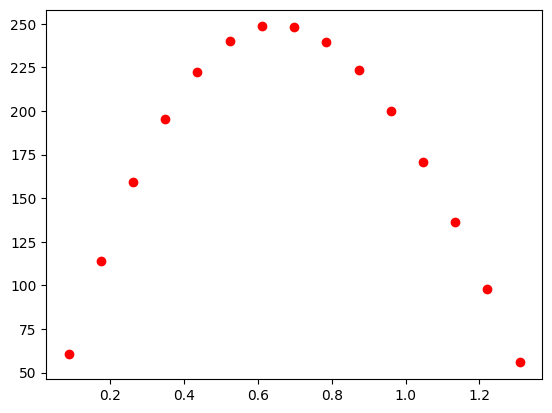

In [58]:
# Alcance maximo como funcion de theta
plt.plot(theta, Rmax,"ro" )

In [59]:
#Realicemos una interpolacion de R como función de theta empleando la funcion CubicSpline
from scipy import interpolate

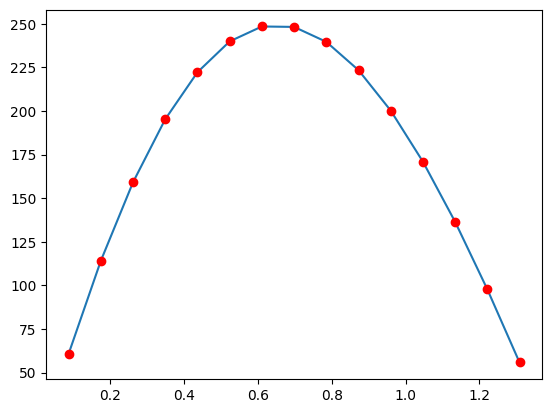

In [60]:
f=interpolate.CubicSpline(theta,Rmax)
plt.plot(theta,f(theta))
plt.plot(theta, Rmax,"ro" )




# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

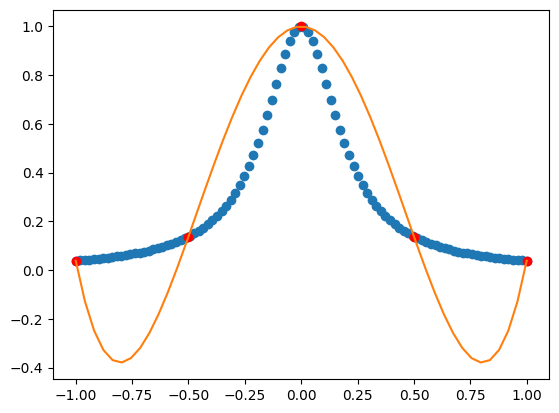

In [61]:
import numpy as np
import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt
from scipy import interpolate

f_s = lambda x: 1/(1+25*x**2)
N=5
x_=np.linspace(-1,1,N)

#Lagrange
p=lagrange(x_,f_s(x_))
p
x_p=np.linspace(np.min(x_),np.max(x_))

x=np.linspace(-1,1,100)
plt.figure()
plt.plot(x,f_s(x),'o')
plt.plot(x_,f_s(x_),'ro')
plt.plot(x_p,p(x_p),)

In [62]:
def interpolacion(N):
  n=N+1
  x_=np.linspace(-1,1,n)

  #interpolación
  poly=lagrange(x_,f_s(x_))

  #Valores de x con los que se grafica la interpolación
  x_p=np.linspace(np.min(x_),np.max(x_))
  return x_p,poly


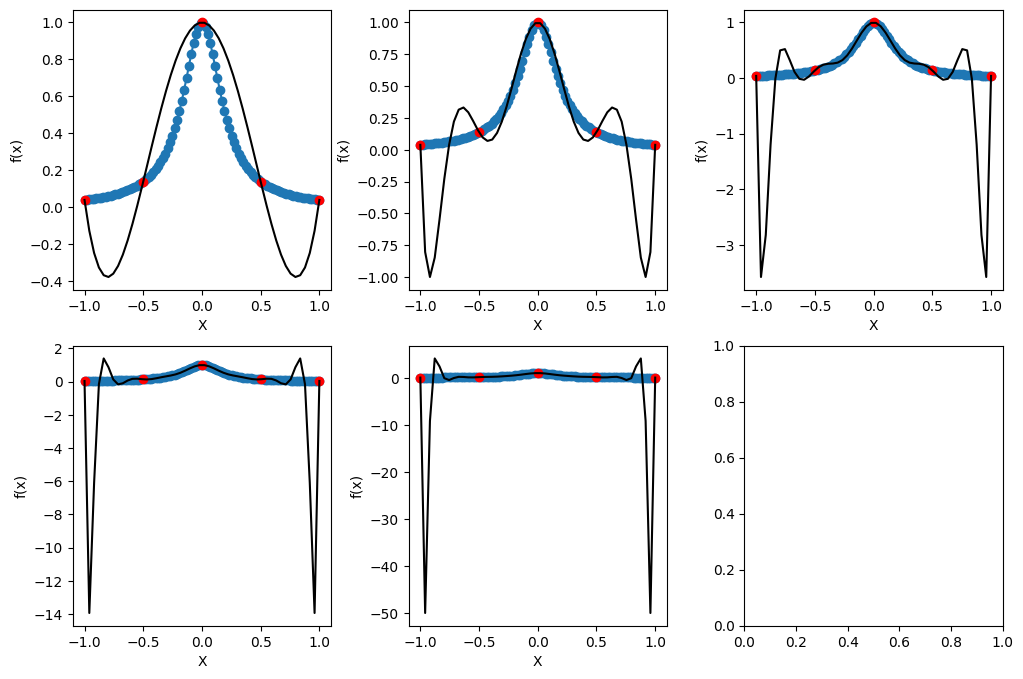

In [63]:
#Grafica
N=[4,8,12,16,20]

i=0

fig,axs=plt.subplots(figsize=(12,8),nrows=2,ncols=3)
for n in N:
  ax=axs.flatten()
  ax[i].plot(x,f_s(x),'o-')
  ax[i].plot(x_,f_s(x_),'ro')
  N=n
  x_p,poly=interpolacion(N)
  ax[i].plot(x_p,poly(x_p),"k")
  ax[i].set_xlabel('X')
  ax[i].set_ylabel('f(x)')
  i=i+1

fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.2)




-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


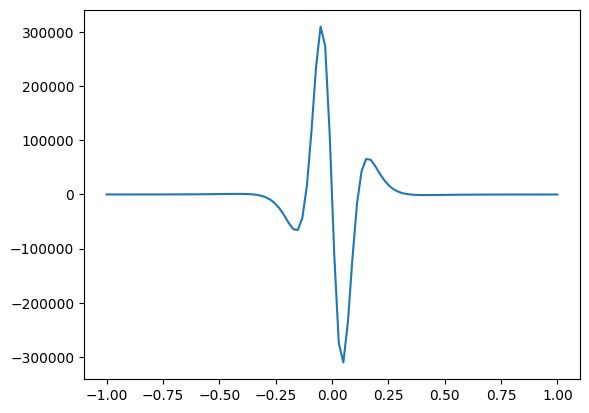

In [64]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)


print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

In [65]:
N=4
xx,P=interpolacion(N)


In [66]:
f_s = lambda x: 1/(1+25*x**2)
x = sp.symbols("x") # x será una variable simbólica
f_s(x)
f5 = sp.diff(f_s(x),x,N+1)
print(f5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


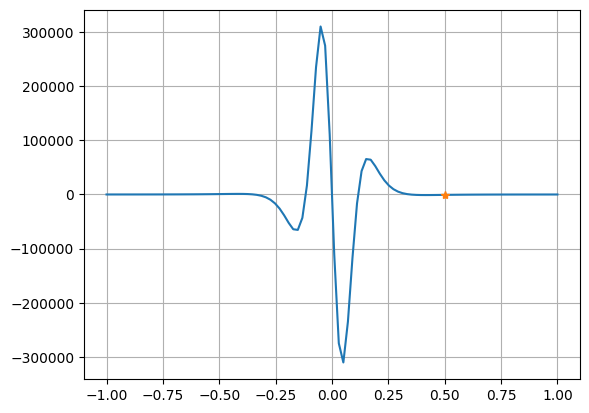

In [67]:
x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.plot(0.5,fxn5(0.5),'*')
plt.grid()
plt.show()

In [68]:
P.coef
print(P)

       4             3         2
3.316 x + 1.041e-17 x - 4.277 x + 5.204e-18 x + 1


In [69]:
N=5
X_=np.linspace(-1,1,N)
X_

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [70]:
(0.5-X_[0])*(0.5-X_[1])*(0.5-X_[2])*(0.5-X_[3])*(0.5-X_[4])

-0.0


# 3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


In [71]:
def f_s(x):
  return 1/(1+25*x**2)
x=sp.Symbol("x")
f_s(x)
f_p = sp.diff(f_s(x), x, 1)
f_p


   -50⋅x    
────────────
           2
⎛    2    ⎞ 
⎝25⋅x  + 1⎠ 

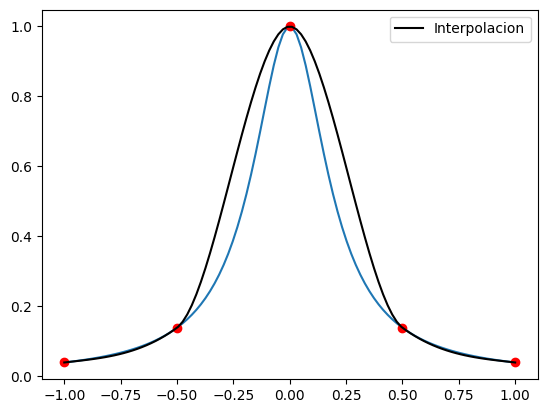

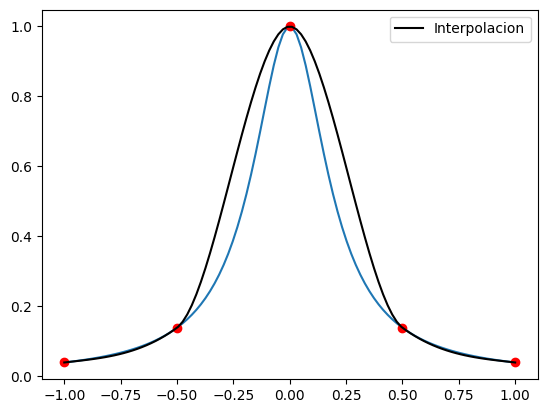

In [73]:
fun = sp.lambdify(x,f_s(x),'numpy') #numpy funcion
funp = sp.lambdify(x,f_p,'numpy') #numpy funcion

xx=np.linspace(-1,1,100)
plt.plot(xx,fun(xx))# Graficacion de la funcion

#INterpolacion
N=4
x_= np.linspace(-1,1,N+1)
plt.plot(x_,fun(x_),"ro")# Graficacion de la funcion

h = interpolate.CubicHermiteSpline(x_,fun(x_),funp(x_))
plt.plot(xx,h(xx),"k-",label="Interpolacion")
plt.legend()



29697746435679.55


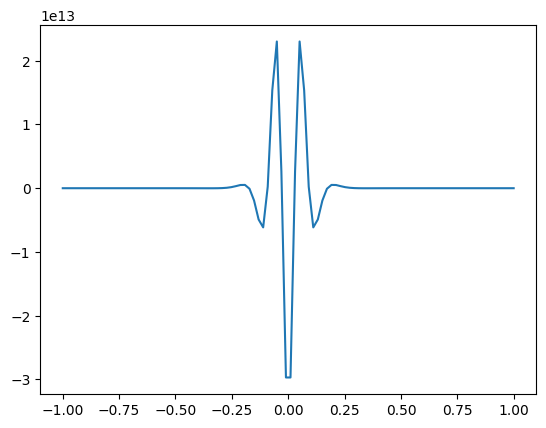

In [74]:
f_s = lambda x: 1/(1+25*x**2)
x=sp.Symbol("x")
f_p = sp.diff(f_s(x), x, 10)
funP_Error = sp.lambdify(x,f_p,'numpy') #numpy funcion
plt.plot(xx,funP_Error(xx))
m=np.max(abs(funP_Error(xx)))
print(m)

In [76]:
import math
E=(m/(math.factorial(10)))*(xx-x_[0])**2*(xx-x_[1])**2*(xx-x_[2])**2*(xx-x_[3])**2*(xx-x_[4])**2
E

array([0.00000000e+00, 6.33558303e+03, 2.12587467e+04, 3.99105409e+04,
       5.88609569e+04, 7.58224766e+04, 8.94052949e+04, 9.89098082e+04,
       1.04152287e+05, 1.05319965e+05, 1.02852057e+05, 9.73435325e+04,
       8.94686917e+04, 7.99218868e+04, 6.93729452e+04, 5.84350868e+04,
       4.76433403e+04, 3.74416629e+04, 2.81771606e+04, 2.00999780e+04,
       1.33675982e+04, 8.05244463e+03, 4.15182127e+03, 1.59936252e+03,
       2.77286357e+02, 2.88586882e+01, 6.70581047e+02, 2.00370920e+03,
       3.82479664e+03, 5.93503518e+03, 8.14823495e+03, 1.02973483e+04,
       1.22394970e+04, 1.38595112e+04, 1.50720266e+04, 1.58222254e+04,
       1.60853322e+04, 1.58649993e+04, 1.51907353e+04, 1.41145409e+04,
       1.27069268e+04, 1.10524881e+04, 9.24521315e+03, 7.38369811e+03,
       5.56643073e+03, 3.88729808e+03, 2.43145780e+03, 1.27169785e+03,
       4.65391394e+02, 5.21347026e+01, 5.21347026e+01, 4.65391394e+02,
       1.27169785e+03, 2.43145780e+03, 3.88729808e+03, 5.56643073e+03,
      

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [77]:
from PIL import Image
import requests
from io import BytesIO


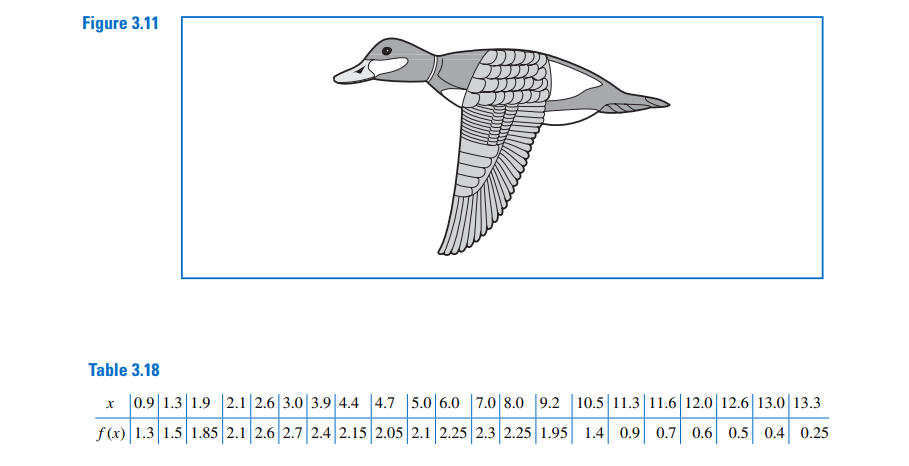

In [78]:
url = 'https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/img/paloma.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

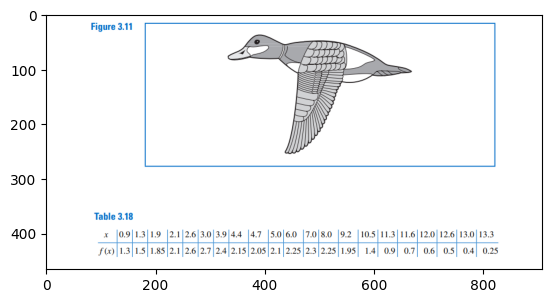

In [79]:
pato=np.array(img)
plt.imshow(pato)

In [80]:
#Definimos unos arreglos con los puntos para realizar la interpolacion
x=np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
fx=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

P=lagrange(x,fx)
print(P)

            20             19             18             17
-3.075e-11 x  + 4.279e-09 x  - 2.773e-07 x  + 1.111e-05 x 
              16            15           14         13         12
 - 0.0003082 x  + 0.006286 x  - 0.09769 x  + 1.183 x  - 11.32 x 
          11         10        9        8             7             6
 + 86.25 x  - 525.8 x  + 2564 x - 9969 x + 3.068e+04 x - 7.387e+04 x
              5             4           3             2
 + 1.368e+05 x - 1.899e+05 x + 1.9e+05 x - 1.287e+05 x + 5.246e+04 x - 9653


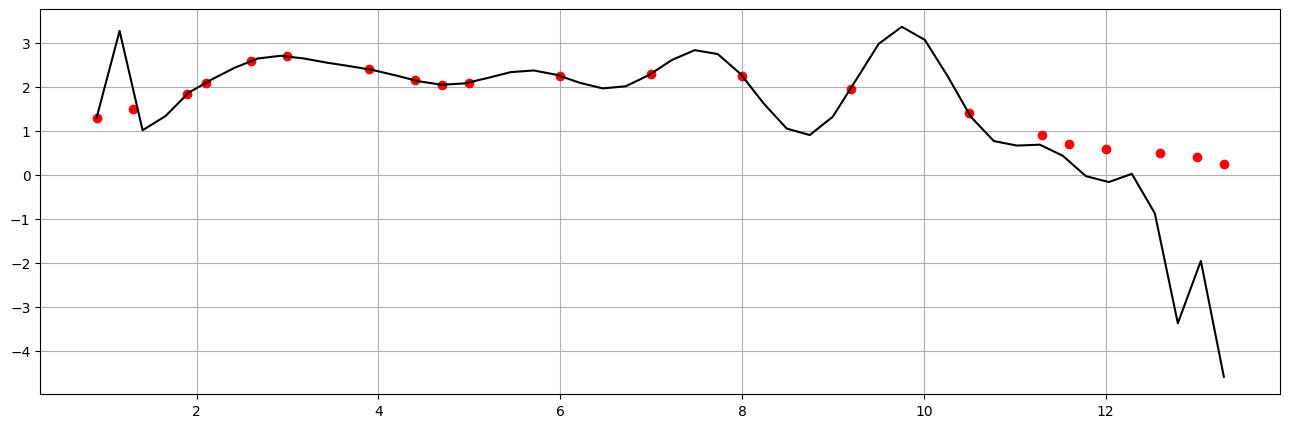

In [81]:
#Graficamos la interpolacion de lagrange
plt.figure(figsize=(16,5))
plt.plot(x,fx,'ro')
x_=np.linspace(np.min(x),np.max(x))
plt.plot(x_,P(x_),'k')
plt.grid()

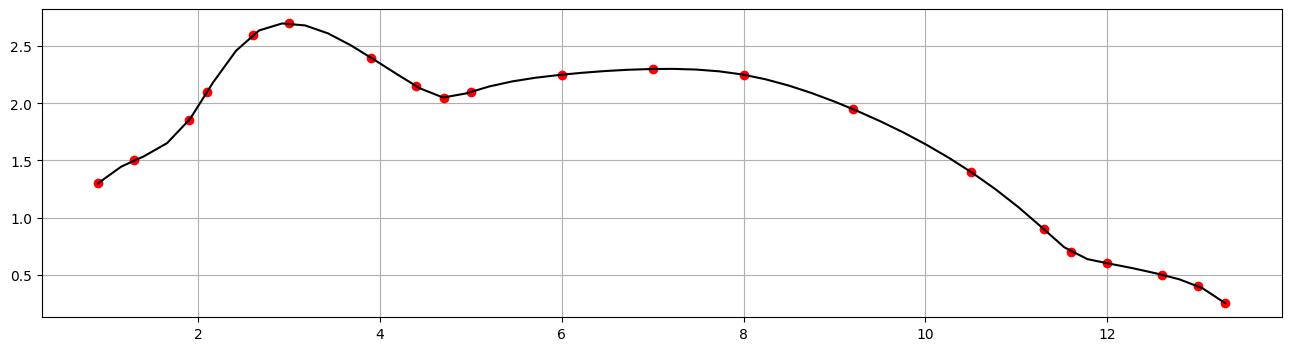

In [86]:
from scipy.interpolate import CubicSpline
P_c=CubicSpline(x,fx)
x_=np.linspace(np.min(x),np.max(x))
plt.figure(figsize=(16,4))
plt.plot(x,fx,'ro')
plt.plot(x_,P_c(x_),'k')
plt.grid()